<a href="https://colab.research.google.com/github/Daniela121394/ds_portfolio.github.io/blob/main/notebooks/Clustering%20completo-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T6%20-%204%20-%20Clustering%20completo-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [5]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17706, done.
remote: Total 17706 (delta 0), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17706/17706), 523.15 MiB | 26.06 MiB/s, done.
Resolving deltas: 100% (333/333), done.
Checking out files: 100% (16940/16940), done.


# Damos acceso a nuestro Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
#!ls '/content/drive/My Drive' 

Mounted at /content/drive


In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Clustering con Python

### Importar el dataset

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv("/content/python-ml-course/datasets/wine/winequality-red.csv", sep = ";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

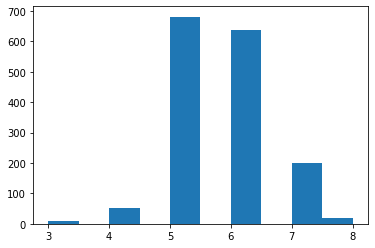

In [9]:
plt.hist(df["quality"])

In [10]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [11]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [14]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

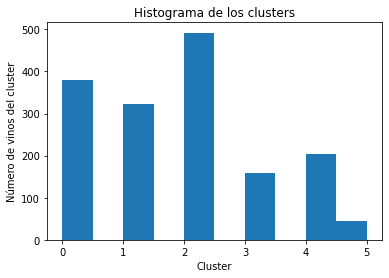

In [15]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [16]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Z = linkage(df_norm, "ward")

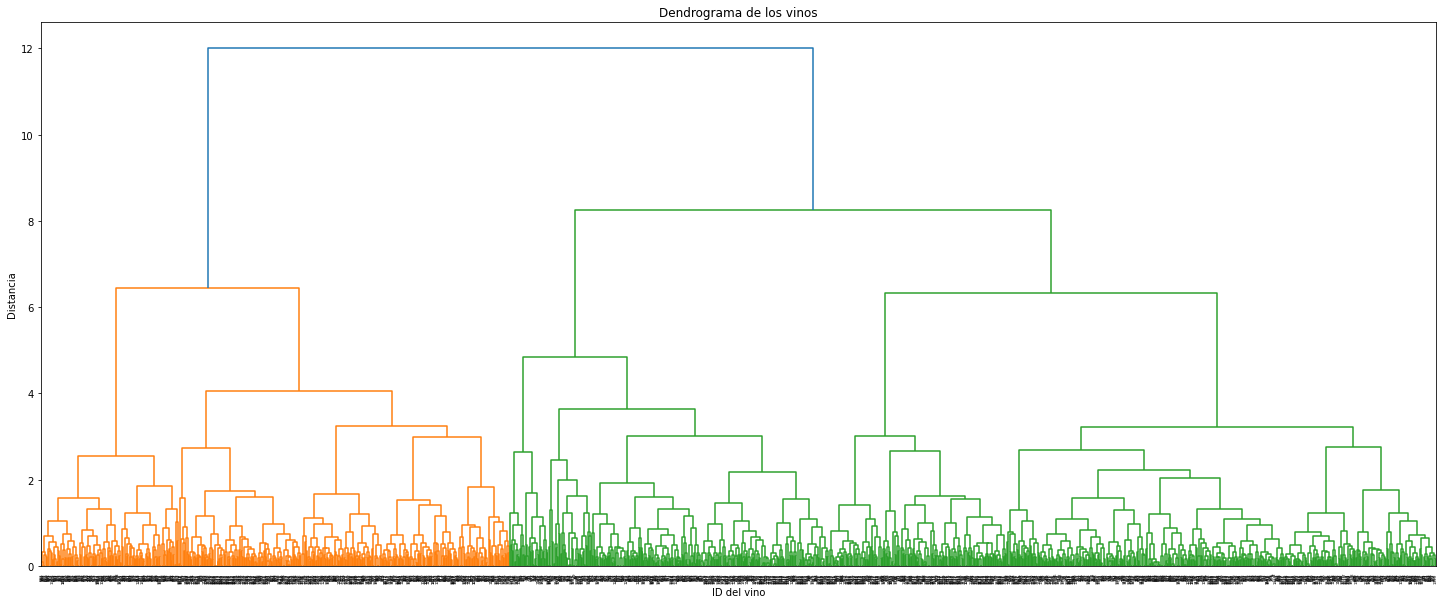

In [19]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

## K-means

In [20]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [21]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [22]:
model.labels_

array([4, 4, 4, ..., 2, 4, 5], dtype=int32)

In [23]:
md_k = pd.Series(model.labels_)

In [24]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [25]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,4


(array([275.,   0., 217.,   0., 213.,   0., 299.,   0., 348., 247.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

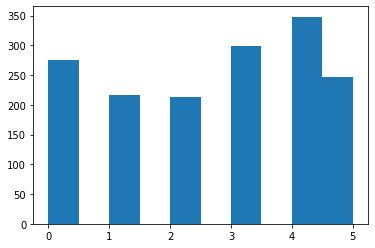

In [26]:
plt.hist(md_k)

In [27]:
model.cluster_centers_

array([[0.32003218, 0.27769614, 0.31283636, 0.16211706, 0.12906966,
        0.40079385, 0.31298426, 0.54187959, 0.42783107, 0.18956995,
        0.21821911, 0.45309091],
       [0.59079972, 0.209346  , 0.54105991, 0.13575532, 0.17599225,
        0.14370092, 0.09863054, 0.66250161, 0.3140172 , 0.25351141,
        0.28136595, 0.54009217],
       [0.17279488, 0.31834845, 0.0957277 , 0.09373593, 0.09468049,
        0.25114065, 0.12501866, 0.31738744, 0.57898044, 0.18548818,
        0.49984351, 0.61502347],
       [0.32542102, 0.27681312, 0.26      , 0.08746048, 0.13114946,
        0.13608743, 0.12210312, 0.51699252, 0.42327443, 0.18554864,
        0.21551325, 0.49498328],
       [0.2369291 , 0.38932845, 0.06663793, 0.09379428, 0.12074722,
        0.16725352, 0.10677877, 0.47966564, 0.52359942, 0.15173102,
        0.23493958, 0.42068966],
       [0.37884705, 0.15704897, 0.43939271, 0.10803616, 0.10675688,
        0.16684724, 0.08453384, 0.41279495, 0.40960821, 0.23993309,
        0.50171286,

In [28]:
model.inertia_

188.56434184188947

## Interpretación final

In [29]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.320032,0.277696,0.312836,0.162117,0.129070,0.400794,0.312984,0.541880,0.427831,0.189570,0.218219,0.453091,1.036364
1,0.590800,0.209346,0.541060,0.135755,0.175992,0.143701,0.098631,0.662502,0.314017,0.253511,0.281366,0.540092,2.603687
2,0.172795,0.318348,0.095728,0.093736,0.094680,0.251141,0.125019,0.317387,0.578980,0.185488,0.499844,0.615023,3.450704
3,0.325421,0.276813,0.260000,0.087460,0.131149,0.136087,0.122103,0.516993,0.423274,0.185549,0.215513,0.494983,1.571906
4,0.236929,0.389328,0.066638,0.093794,0.120747,0.167254,0.106779,0.479666,0.523599,0.151731,0.234940,0.420690,2.132184
5,0.378847,0.157049,0.439393,0.108036,0.106757,0.166847,0.084534,0.412795,0.409608,0.239933,0.501713,0.711741,0.076923
